# scikit-learn库

sk-learn库是当今最流行的机器学习算法库之一，可用来解决分类与回归问题。  
下面以鸢尾花数据集为例，简单了解八大传统机器学习分类算法的sk-learn实现。

## 鸢尾花数据集

1. 下载数据集

In [1]:
from sklearn import datasets
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")

2. 查看数据集

In [3]:
type(iris)

pandas.core.frame.DataFrame

In [4]:
iris.shape

(150, 5)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()    # 没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.species.value_counts()    # 一共有三个类别

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

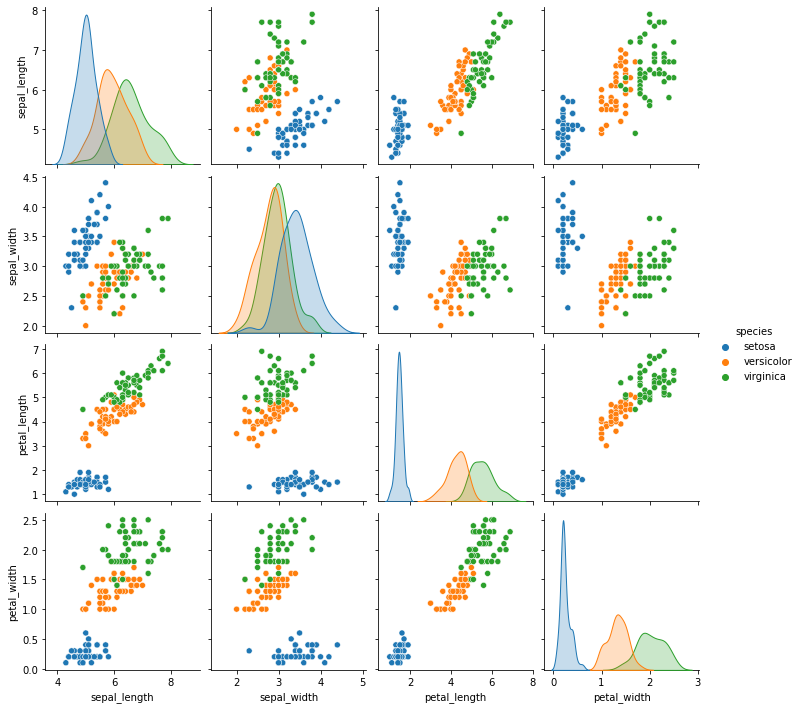

In [9]:
# 特征之间的相关性、对分类有什么作用
sns.pairplot(data=iris,hue="species")

3. 标签清洗  
为了简化问题，去掉花萼的长度和宽度这两列

In [10]:
iris_simple = iris.drop(['sepal_length','sepal_width'],axis=1)
iris_simple.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


4. 标签编码

In [11]:
# 三类分别对应0，1，2
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_simple['species'] = encoder.fit_transform(iris_simple['species'])
iris_simple.head()

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


5. 当不同特征之间的数据量级相差较大时，需要进行数据的标准化  
本数据集特征量级接近，实际不需要标准化

In [12]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

trans = StandardScaler()
# 将花瓣长度和花瓣宽度两列特征标准化
_iris_simple = trans.fit_transform(iris_simple[["petal_length","petal_width"]])
# 转化为数据框
_iris_simple = pd.DataFrame(_iris_simple,columns=["petal_length","petal_width"])
_iris_simple.describe()

,petal_length,petal_width
count,1.500000e+02,1.500000e+02
mean,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.447076e+00
25%,-1.226552e+00,-1.183812e+00
50%,3.364776e-01,1.325097e-01
75%,7.627583e-01,7.906707e-01
max,1.785832e+00,1.712096e+00


6. 构建训练集和测试集

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(iris_simple, test_size=0.2)     # 20%数据作为测试集
test_set.head() 

,petal_length,petal_width,species
99,4.1,1.3,1
101,5.1,1.9,2
74,4.3,1.3,1
124,5.7,2.1,2
9,1.5,0.1,0


In [14]:
iris_x_train = train_set[['petal_length','petal_width']]    # 提取数据集的特征，双层中括号构建了一个新的数据框
iris_x_train.head()

,petal_length,petal_width
34,1.5,0.2
76,4.8,1.4
114,5.1,2.4
1,1.4,0.2
137,5.5,1.8


In [15]:
iris_y_train = train_set['species'].copy()     # 提取数据集的标签，需要用copy是因为train_set['species']是引用
iris_y_train.head()

34     0
76     1
114    2
1      0
137    2
Name: species, dtype: int32

In [16]:
iris_x_test = test_set[['petal_length','petal_width']]     # 提取测试集的特征
iris_x_test.head()

,petal_length,petal_width
99,4.1,1.3
101,5.1,1.9
74,4.3,1.3
124,5.7,2.1
9,1.5,0.1


In [17]:
iris_y_test = test_set['species'].copy()     # 提取测试集的标签
iris_y_test.head() 

99     1
101    2
74     1
124    2
9      0
Name: species, dtype: int32

## k邻近算法

k邻近算法的基本思想是找到与待预测点最近的训练数据集中的k个邻居，把k个邻近中最常见的类别预测为带预测点的类别

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# 构建分类器对象
clf = KNeighborsClassifier()
# 训练
clf.fit(iris_x_train,iris_y_train)
# 预测
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 2 1 2 0 0 2 1 0 2 2 1 1 0 0 0 0 1 2 0 2 1 1 0 0 2 2 2 1 0]
[1 2 1 2 0 0 2 1 0 1 1 2 1 0 0 0 0 1 2 0 2 1 2 0 0 2 2 1 1 0]


In [22]:
# 将编码恢复为标签
encoder.inverse_transform(res)

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [23]:
# 评估
clf.score(iris_x_test,iris_y_test)

0.8333333333333334

In [27]:
# 保存结果
out = iris_x_test.copy()
out['y'] = iris_y_test
out['pre'] = res
out.head()

,petal_length,petal_width,y,pre
99,4.1,1.3,1,1
101,5.1,1.9,2,2
74,4.3,1.3,1,1
124,5.7,2.1,2,2
9,1.5,0.1,0,0


In [28]:
out.to_csv("file/iris_predict.csv")

可视化

In [45]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw(clf):
    # 网格化
    M, N = 500, 500
    x1_min, x2_min = iris_simple[['petal_length','petal_width']].min(axis=0)    # 最小值
    x1_max, x2_max = iris_simple[['petal_length','petal_width']].max(axis=0)    # 最大值
    t1 = np.linspace(x1_min, x1_max, M)    # 在最小值和最大值之间间隔均匀地创建M个点的数组
    t2 = np.linspace(x2_min, x2_max, N)
    x1, x2 = np.meshgrid(t1, t2)    # 将t1竖向扩展，t2横向扩展，各自变为500*500的矩阵
    
    # 预测
    x_show = np.stack((x1.flat, x2.flat), axis=1)    # 将两个矩阵展开为一维数组，然后按列堆叠，得到250000*2的数组，第一列是长度，第二列是宽度
    y_predict = clf.predict(x_show)    # 用网格点预测
    
    # 配色
    cm_light = mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g','r','b'])
    
    # 绘制预测区域图
    plt.figure(figsize=(10,6))
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)
    
    # 绘制原始数据点
    plt.scatter(iris_simple['petal_length'], iris_simple['petal_width'], label=None,
               c=iris_simple['species'], cmap=cm_dark, marker='o', edgecolors='k')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    
    # 绘制图例
    color = ['g','r','b']
    species = ['setosa','virginica','versicolor']
    for i in  range(3):
        plt.scatter([],[],c=color[i],s=40,label=species[i])    # 利用空点绘制图例
    plt.legend(loc="best")
    plt.title("iris_classifier")

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_19240/407085057.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)


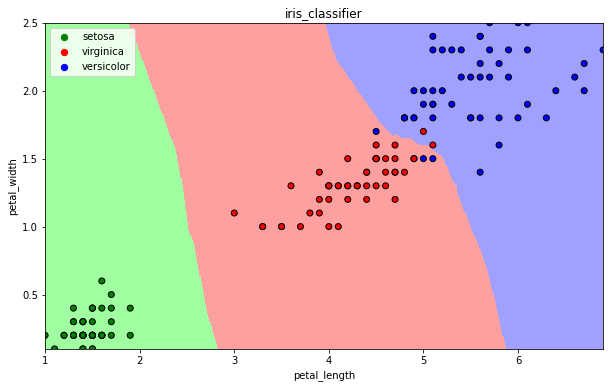

In [46]:
draw(clf)

## 朴素贝叶斯算法

朴素贝叶斯算法的基本思想是当 $X=(x_1,x_2)$ 发生时，哪一个 $y_k$ 发生的概率最大

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
# 构建分类器对象
clf = GaussianNB()
# 训练
clf.fit(iris_x_train, iris_y_train)
# 预测
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)
# 评估
clf.score(iris_x_test,iris_y_test)

[1 2 1 2 0 0 2 1 0 2 2 1 1 0 0 0 0 1 2 0 2 1 1 0 0 2 2 2 1 0]
[1 2 1 2 0 0 2 1 0 1 1 2 1 0 0 0 0 1 2 0 2 1 2 0 0 2 2 1 1 0]


0.8333333333333334

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_19240/407085057.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)


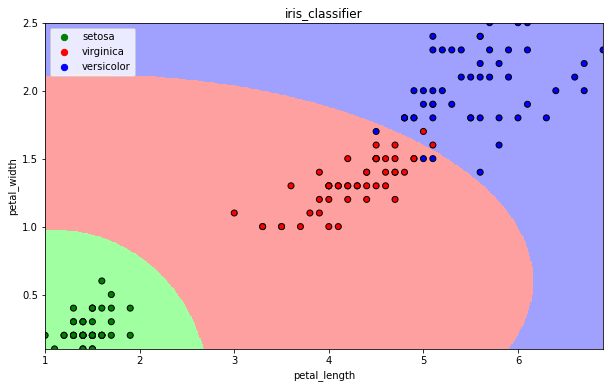

In [49]:
draw(clf)

## 决策树算法

CART算法的基本思想是每次通过一个特征，将数据尽可能地分为纯净的两类，递归地分下去

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# 构建分类器对象
clf = DecisionTreeClassifier()
# 训练
clf.fit(iris_x_train,iris_y_train)
# 预测
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)
# 评估
clf.score(iris_x_test,iris_y_test)

[1 2 1 2 0 0 2 1 0 2 1 1 1 0 0 0 0 1 2 0 2 1 1 0 0 2 2 2 1 0]
[1 2 1 2 0 0 2 1 0 1 1 2 1 0 0 0 0 1 2 0 2 1 2 0 0 2 2 1 1 0]


0.8666666666666667

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_19240/407085057.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)


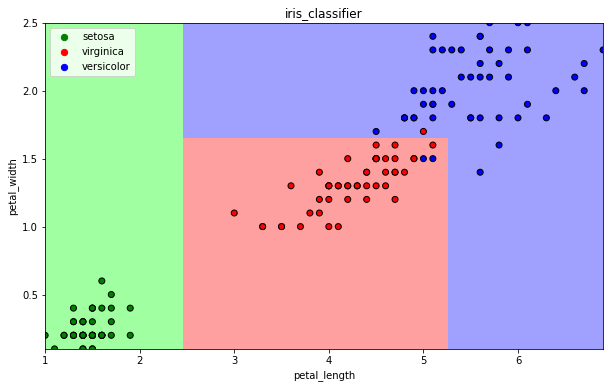

In [53]:
draw(clf)

## 逻辑回归算法

* 训练：通过一个映射方式，将特征 $X=(x_1,x_2)$ 映射成 $P(y=c_k)$，求使得所有概率之积最大化的映射方式里的参数  
* 预测：计算 $P(y=c_k)$ 取概率最大的那个类别作为预测对象的分类

In [54]:
from sklearn.linear_model import LogisticRegression

In [57]:
# 构建分类器对象
clf = LogisticRegression(solver='saga', max_iter=1000)
# 训练
clf.fit(iris_x_train, iris_y_train)
# 预测
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)
# 评估
clf.score(iris_x_test,iris_y_test)

[1 2 1 2 0 0 2 1 0 2 2 1 1 0 0 0 0 1 2 0 2 1 1 0 0 2 2 2 1 0]
[1 2 1 2 0 0 2 1 0 1 1 2 1 0 0 0 0 1 2 0 2 1 2 0 0 2 2 1 1 0]


0.8333333333333334

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_19240/407085057.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)


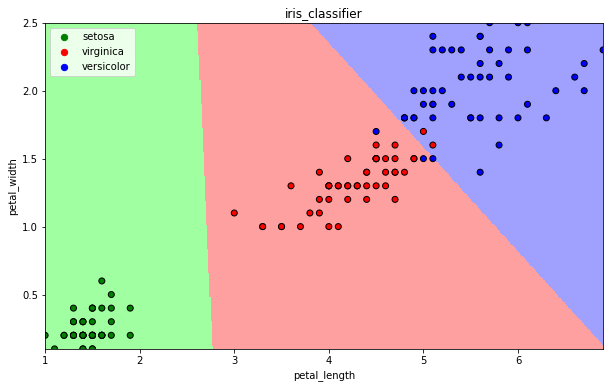

In [58]:
draw(clf)

## 支持向量机算法

以二分类为例，假设数据可以完全分开，用一个超平面将两类数据完全分开，且最近点到平面的距离最大

In [59]:
from sklearn.svm import SVC

In [61]:
# 构建分类器对象
clf = SVC()
# 训练
clf.fit(iris_x_train,iris_y_train)
# 预测
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)
# 评估
clf.score(iris_x_test,iris_y_test)

[1 2 1 2 0 0 2 1 0 2 2 1 1 0 0 0 0 1 2 0 2 1 1 0 0 2 2 1 1 0]
[1 2 1 2 0 0 2 1 0 1 1 2 1 0 0 0 0 1 2 0 2 1 2 0 0 2 2 1 1 0]


0.8666666666666667

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_19240/407085057.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)


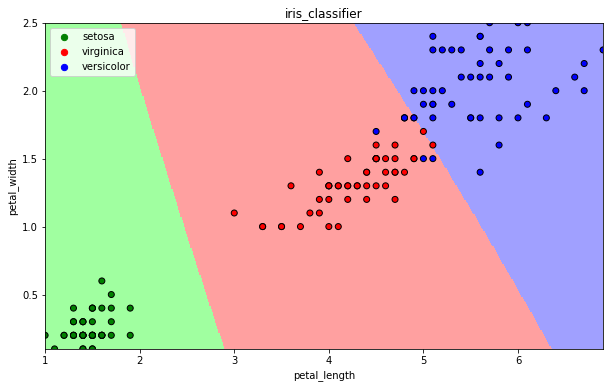

In [62]:
draw(clf)

## 集成方法——随机森林

在训练集中训练集有放回地随机抽取m个数据，构成一组，共抽取n组采样集，训练得到n个弱分类器，将n个弱分类器进行组合得到强分类器。  
弱分类器一般用决策树或神经网络。

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
# 构建分类器对象
clf = RandomForestClassifier()
# 训练
clf.fit(iris_x_train,iris_y_train)
# 预测
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)
# 评估
clf.score(iris_x_test,iris_y_test)

[1 2 1 2 0 0 2 1 0 2 2 1 1 0 0 0 0 1 2 0 2 1 1 0 0 2 2 2 1 0]
[1 2 1 2 0 0 2 1 0 1 1 2 1 0 0 0 0 1 2 0 2 1 2 0 0 2 2 1 1 0]


0.8333333333333334

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_19240/407085057.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)


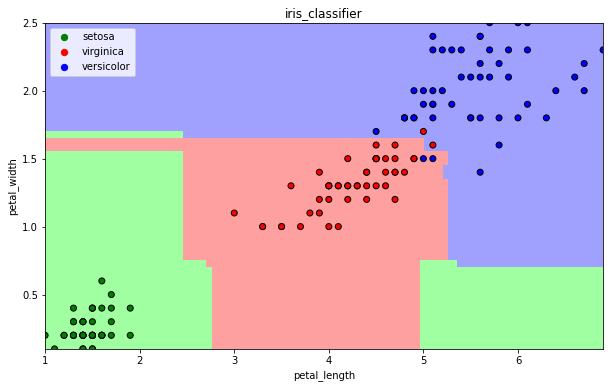

In [66]:
draw(clf)

## 集成方法——Adaboost

用初始数据权重训练得到第一个弱分类器，根据误差率计算弱分类器系数，更新数据的权重，使用新的权重训练得到第二个弱分类器，以此类推，根据各自系数，将所有弱分类器加权求和获得强分类器。

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
# 构建分类器对象
clf = AdaBoostClassifier()
# 训练
clf.fit(iris_x_train,iris_y_train)
# 预测
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)
# 评估
clf.score(iris_x_test,iris_y_test)

[1 2 1 2 0 0 2 1 0 2 2 2 1 0 0 0 0 1 2 0 2 1 2 0 0 2 2 2 1 0]
[1 2 1 2 0 0 2 1 0 1 1 2 1 0 0 0 0 1 2 0 2 1 2 0 0 2 2 1 1 0]


0.9

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_19240/407085057.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)


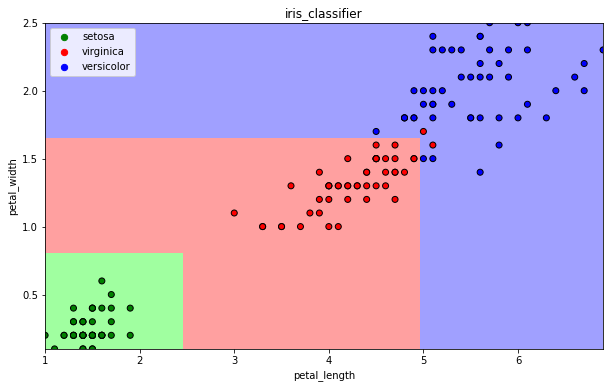

In [69]:
draw(clf)

## 集成方法——梯度提升树GBDT

使用训练集获得第一个弱分类器，获得真实值和预测值的残差，然后不断地拟合残差，所有弱分类器相加得到强分类器。

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
# 构建分类器对象
clf = GradientBoostingClassifier()
# 训练
clf.fit(iris_x_train,iris_y_train)
# 预测
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)
# 评估
clf.score(iris_x_test,iris_y_test)

[1 2 1 2 0 0 2 1 0 2 1 1 1 0 0 0 0 1 2 0 2 1 1 0 0 2 2 2 1 0]
[1 2 1 2 0 0 2 1 0 1 1 2 1 0 0 0 0 1 2 0 2 1 2 0 0 2 2 1 1 0]


0.8666666666666667

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_19240/407085057.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)


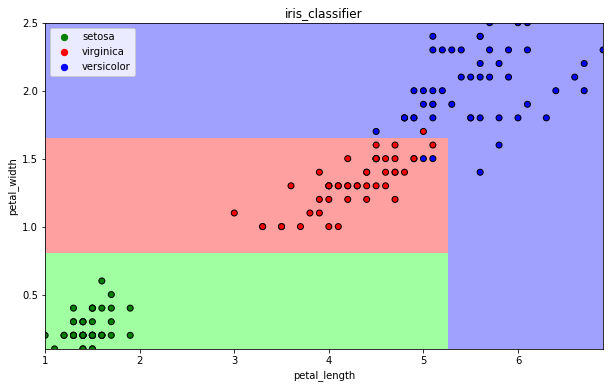

In [72]:
draw(clf)

## 其他算法

### xgboost

GBDT的损失函数只对误差部分做负梯度（一阶泰勒）展开，XGBoost损失函数对误差部分做二阶泰勒展开，更加准确，更快收敛。

### lightgbm

微软：快速的，分布式的，高性能的基于决策树算法的梯度提升框架，速度更快。

### stacking

模型融合，先建立几个简单的模型进行训练，第二级学习器会基于前级模型的预测结果进行再训练。